In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [315]:
# Load feature data (X) and target data (Y)
X_train = pd.read_csv('ex4x.dat', delim_whitespace=True, header=None)
Y_train = pd.read_csv('ex4y.dat', delim_whitespace=True, header=None)

# # Add an intercept column (ones) to X
# X_train.insert(0, 'Intercept', 1)

# Convert y to a numpy array (for easier manipulation later)
Y_train = Y_train.values

In [316]:
X_train

,0,1
0,55.5,69.5
1,41.0,81.5
2,53.5,86.0
3,46.0,84.0
4,41.0,73.5
...,...,...
75,20.0,65.5
76,38.0,65.0
77,18.5,74.5
78,16.0,72.5


In [317]:
Y_train

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [318]:
X_train

,0,1
0,55.5,69.5
1,41.0,81.5
2,53.5,86.0
3,46.0,84.0
4,41.0,73.5
...,...,...
75,20.0,65.5
76,38.0,65.0
77,18.5,74.5
78,16.0,72.5


In [319]:
X_train.head()

,0,1
0,55.5,69.5
1,41.0,81.5
2,53.5,86.0
3,46.0,84.0
4,41.0,73.5


In [320]:
X_train = X_train
Y_train = Y_train
print(X_train.shape, "\n", Y_train.shape)

(80, 2) 
 (80, 1)


In [321]:
print(X_train.shape[1])
print(X_train.shape[0])

2
80


In [322]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [323]:
def model(X_train, Y_train, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X_train) + B
        A = sigmoid(Z)
        
        # Avoid log of zero by clipping A
        A = np.clip(A, 1e-10, 1 - 1e-10)
        
        # cost function
        cost = -(1/m)*np.sum( Y_train*np.log(A) + (1-Y_train)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y_train, X_train.T)
        dB = (1/m)*np.sum(A - Y_train)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/5) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list
        

In [324]:
iterations = 1000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate, iterations)

cost after  0 iteration is :  55.451774444795625
cost after  200 iteration is :  8.000000662322968e-09
cost after  400 iteration is :  8.000000662322968e-09
cost after  600 iteration is :  8.000000662322968e-09
cost after  800 iteration is :  8.000000662322968e-09


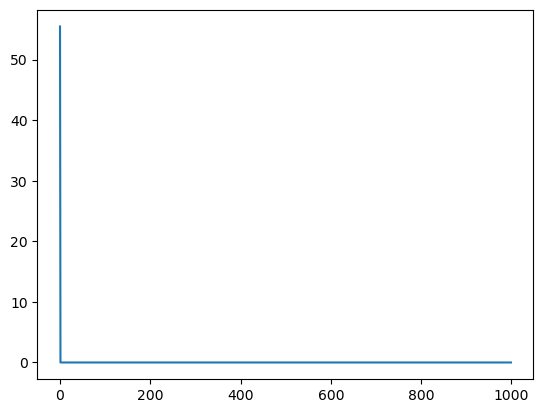

In [325]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [326]:
def accuracy(X_train, Y_train, W, B):
    
    Z = np.dot(W.T, X_train) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y_train))/Y_train.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [327]:
accuracy(X_train, Y_train, W, B)

Accuracy of the model is :  100.0 %
